<a href="https://colab.research.google.com/github/pedrowemanuel/exercicios-inteligencia-artificial-python/blob/main/Algorimto_PSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PSO

In [47]:
#---Algoritmo PSO -------
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [124]:
# função cria gráficos
def cria_grafico_resultado(x_particles, y_particles):
    y_particles_best_hist = np.min(y_particles, axis=0)

    y_best_global = np.min(y_particles[:])
    index_best_global = np.argmin(y_particles[:])
    
    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 2))
    
    # Limites da função sendo plotada
    ax1.plot((0,n_iterations),(np.min(y),np.min(y)), '--g', label="min$f(x)$")
    
    # Convergência da melhor partícula e do pior valor de partícula
    ax1.plot(np.arange(n_iterations),y_particles_best_hist,'b',  label="$p_{best}$")
    
    ax1.set_xlim((0,n_iterations))
    
    ax1.set_ylabel('$f(x)$')
    ax1.set_xlabel('$i$ (iteração)')
    ax1.set_title('Convergencia')   
    
    ax1.legend()

In [276]:
n_iterations = 200
    
def run_PSO(n_particles=5, omega=0.555, phi_p=0.5, phi_g=0.7):
    """ Algortimo PSO para a definição de uma função.
    Params:
        omega = 0.5  # Pesos das particulas (intercial)
        phi_p = 0.1  # melhor peso de particua
        phi_g = 0.1  # Peso global
    
    """
    global x_best_p_global, x_particles, y_particles, u_particles, v_particles
    
    # Nota: estamos usando variáveis ​​globais para facilitar o uso de widgets interativos
    # Este código funcionará bem sem o global (e na verdade será mais seguro)
    
    ## Inicialização:

    x_particles = np.zeros((n_particles, n_iterations))
    x_particles[:, 0] = np.random.uniform(x_lo, x_up, size=n_particles)

    x_best_particles = np.copy(x_particles[:, 0])

    y_particles = f(x_particles[:, 0])
    y_best_global = np.min(y_particles[:])
    index_best_global = np.argmin(y_particles[:])
    x_best_p_global = np.copy(x_particles[index_best_global,0])

    
    
    # unidades de velocidade são [Comprimento / iteração]
    velocity_lo = x_lo-x_up 
    velocity_up = x_up-x_lo 

    u_particles = np.zeros((n_particles, n_iterations))
    u_particles[:, 0] = 0.1*np.random.uniform(velocity_lo, velocity_up, size=n_particles)

    v_particles = np.zeros((n_particles, n_iterations)) # Necessário para traçar a velocidade como vetores
    
    # Inicio do PSO

    iteration = 1
    while iteration <= n_iterations-1:
        for i in range(n_particles):
                x_p = x_particles[i, iteration-1]
                u_p = u_particles[i, iteration-1]
                x_best_p = x_best_particles[i]


                r_p = np.random.uniform(0, 1)
                r_g = np.random.uniform(0, 1)

                u_p_new = omega*u_p+ \
                            phi_p*r_p*(x_best_p-x_p) + \
                            phi_g*r_g*(x_best_p_global-x_p)

                x_p_new = x_p + u_p_new

                if not x_lo <= x_p_new <= x_up: 
                    x_p_new = x_p # ignorar a nova posição, está fora do domínio
                    u_p_new = 0

                x_particles[i, iteration] = np.copy(x_p_new)
                u_particles[i, iteration] = np.copy(u_p_new)

                y_p_best = f(x_best_p)
                y_p_new = f(x_p_new)


                if y_p_new < y_p_best:
                    x_best_particles[i] = np.copy(x_p_new)

                    y_p_best_global = f(x_best_p_global)
                    if y_p_new < y_p_best_global:
                        x_best_p_global = x_p_new

        iteration = iteration + 1
    
    y_particles = f(x_particles)
    
    return x_particles, y_particles

ENCONTRANDO B:

x min global: 5.0
y min global:  25.0
o valor de b é:  5.0




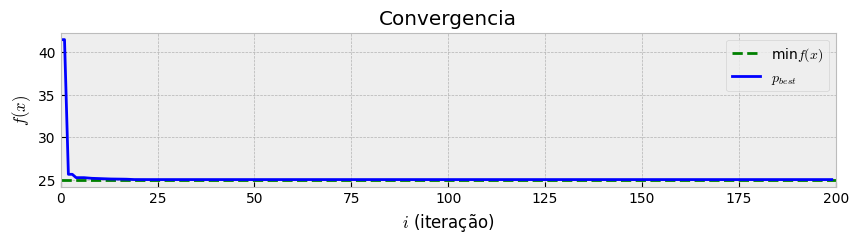

In [277]:
# f(x) = 20 + x² − 10(cos(0) + cos(2πx)), em que b ∈ [+5, 12]

x_lo = 5
x_up = 12
n_points = 2000

x = np.linspace(x_lo, x_up, n_points)

def f(x):
    return 20 + x**2 - 10 *(np.cos(0)  + np.cos(2 * np.pi * x))

y = f(x)

x_particles, y_particles = run_PSO()

(linha, coluna) = np.unravel_index(np.argmin(y_particles), y_particles.shape)

# salvando o valor de x que será usado como constante (b) na função original
b = x_particles[linha][coluna]

print('x min global:', x_particles[linha][coluna])
print('y min global: ', f(x_particles[linha][coluna]))
print("o valor de b é: ", b)

print("\n")

cria_grafico_resultado(x_particles, y_particles)

ENCONTRANDO A:

x min global: -0.9949586409958373
y min global:  25.994959057093286
o valor de a é: -0.9949586409958373


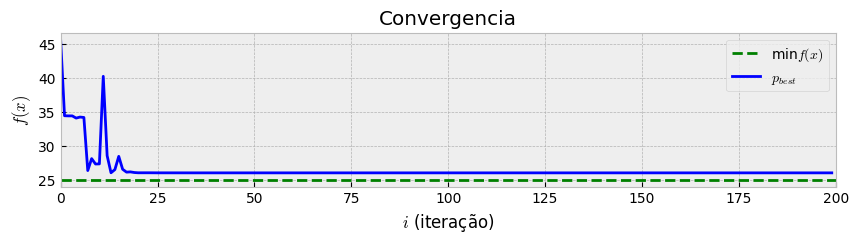

In [321]:
# f(a) = 20 + a² + 5²  − 10(cos(2πa) + cos(2π5)), em que a ∈ [-5, 12]

x_lo = -5
x_up = 12
n_points = 1000

x = np.linspace(x_lo, x_up, n_points)

def f(a):
    return 20 + a**2 +b**2 - 10 *(np.cos(2 * np.pi * a)  + np.cos(2 * np.pi * b))

y = f(x)

x_particles, y_particles = run_PSO()

(linha, coluna) = np.unravel_index(np.argmin(y_particles), y_particles.shape)
a = x_particles[linha][coluna]
print('x min global:', x_particles[linha][coluna])
print('y min global: ', f(x_particles[linha][coluna]))
print('o valor de a é:', a)

cria_grafico_resultado(x_particles, y_particles)

**RESULTADO MIN GLOBAL DA FUNÇÃO:  f(a, b) = 20 + a² + b² − 10(cos(2πa) + cos(2πb)), em que “a ∈ [−5, 12]” e “b ∈ [+5, 12]**

In [324]:
def f(a, b):
    return 20 + a**2 +b**2 - 10 *(np.cos(2 * np.pi * a)  + np.cos(2 * np.pi * b))

print("a = ", a)
print("b = ", b)
print("Min global de f(a,b) é ", f(a,b))

a =  -0.9949586409958373
b =  5.0
Min global de f(a,b) é  25.994959057093286
